In [11]:
"""
Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.
"""

'\nPerform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. \nDraw the inferences from the clusters obtained.\n'

In [13]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [15]:
airlines = pd.read_csv('C:/Users/Ashwini/Downloads/EastWestAirlines.csv')
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [17]:
airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [19]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [21]:
airlines_norm = norm_func(airlines.iloc[:,1:])
airlines_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


# Hierarchical Clustering 

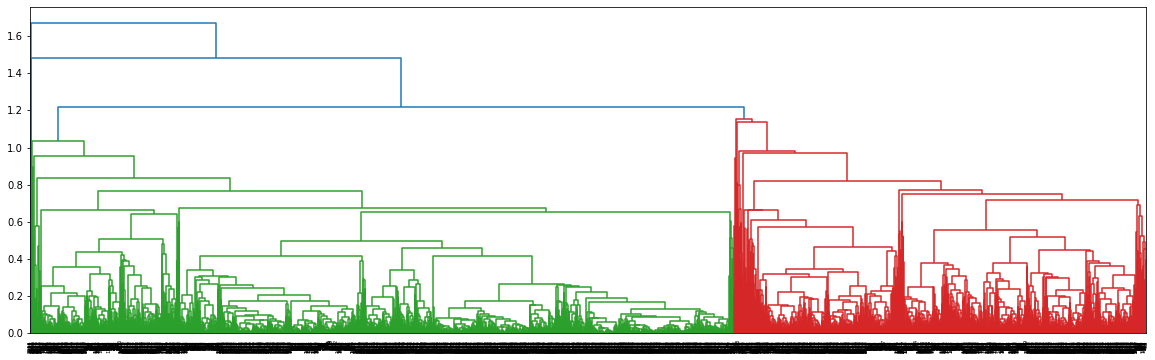

In [23]:
#create dendrogram
plt.figure(figsize = (20,6))
dendrogram = sch.dendrogram(sch.linkage(airlines_norm, method='average'))

In [25]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')
hc

AgglomerativeClustering(linkage='average', n_clusters=5)

In [27]:
y_hc = hc.fit_predict(airlines_norm)

Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [29]:
Clusters.head()

,Clusters
0,1
1,1
2,1
3,1
4,0


In [31]:
airlines_norm['h_clusterid'] = Clusters

In [33]:
airlines_norm.sort_values("h_clusterid")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
1999,0.191881,0.130248,1.00,0.0,0.00,0.371644,0.290698,0.011357,0.056604,0.535086,1.0,0
1505,0.229478,0.000000,0.50,0.0,0.00,0.104181,0.232558,0.051919,0.132075,0.591150,1.0,0
1503,0.297607,0.000000,0.75,0.0,0.00,0.196314,0.209302,0.014602,0.018868,0.574873,1.0,0
3165,0.114272,0.000000,0.00,0.0,0.00,0.078965,0.290698,0.215693,0.226415,0.292018,1.0,0
1501,0.031743,0.165590,0.50,0.0,0.00,0.132723,0.162791,0.000000,0.000000,0.584278,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.056678,0.106028,0.00,0.0,0.50,0.186052,0.302326,0.074634,0.169811,0.812153,1.0,4
1946,0.074419,0.000000,0.75,0.0,1.00,0.362546,0.372093,0.016225,0.018868,0.467567,1.0,4
2364,0.063397,0.000000,1.00,0.0,1.00,0.822974,0.279070,0.000000,0.000000,0.429829,1.0,4
1878,0.075258,0.000000,1.00,0.0,0.75,0.501595,0.372093,0.012980,0.037736,0.494454,1.0,4


In [35]:
airlines['h_clusterid'] = Clusters
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0


In [37]:
airlines_norm.sort_values("h_clusterid")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
1999,0.191881,0.130248,1.00,0.0,0.00,0.371644,0.290698,0.011357,0.056604,0.535086,1.0,0
1505,0.229478,0.000000,0.50,0.0,0.00,0.104181,0.232558,0.051919,0.132075,0.591150,1.0,0
1503,0.297607,0.000000,0.75,0.0,0.00,0.196314,0.209302,0.014602,0.018868,0.574873,1.0,0
3165,0.114272,0.000000,0.00,0.0,0.00,0.078965,0.290698,0.215693,0.226415,0.292018,1.0,0
1501,0.031743,0.165590,0.50,0.0,0.00,0.132723,0.162791,0.000000,0.000000,0.584278,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.056678,0.106028,0.00,0.0,0.50,0.186052,0.302326,0.074634,0.169811,0.812153,1.0,4
1946,0.074419,0.000000,0.75,0.0,1.00,0.362546,0.372093,0.016225,0.018868,0.467567,1.0,4
2364,0.063397,0.000000,1.00,0.0,1.00,0.822974,0.279070,0.000000,0.000000,0.429829,1.0,4
1878,0.075258,0.000000,1.00,0.0,0.75,0.501595,0.372093,0.012980,0.037736,0.494454,1.0,4


# K Means Clustering

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 9, random_state = 0)
kmeans.fit(airlines_norm)

KMeans(n_clusters=9, random_state=0)

In [41]:
kmeans.inertia_

263.0993156523349

In [43]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

wcss = []
sil_score = []
cal_haz_score = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(airlines_norm)
    wcss.append(kmeans.inertia_)
    if i==1:
        continue #min 2 labels needed for silhoutte and cal_haz score (Refer documentation)
    sil_score.append(silhouette_score(airlines_norm, kmeans.labels_))
    cal_haz_score.append(calinski_harabasz_score(airlines_norm, kmeans.labels_))

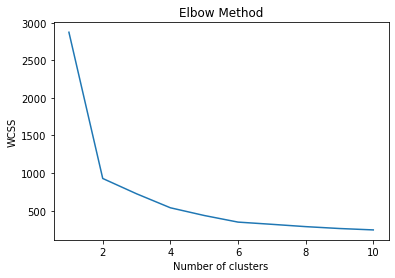

In [45]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [47]:
kmeans.labels_

array([1, 1, 1, ..., 8, 6, 6])

In [49]:
airlines['clusterid_new'] = kmeans.labels_

In [50]:
airlines.sort_values('clusterid_new')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new,h_clusterid
2193,2210,41176,0,1,1,1,7624,7,2624,4,3729,1,0,0
2059,2076,58898,0,1,1,1,23050,15,50,1,4328,1,0,0
3082,3104,54637,0,1,1,1,21181,27,4673,21,2927,1,0,0
3084,3106,25485,0,1,1,1,9655,10,2800,8,2798,1,0,0
3098,3120,214674,0,1,1,1,25688,23,2500,5,2607,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,1364,39946,0,3,1,1,16951,14,0,0,5282,1,9,0
1138,1150,144570,0,4,1,1,49052,15,0,0,5617,1,9,0
1141,1153,22116,0,3,1,1,20809,14,0,0,5463,1,9,0
69,71,47457,0,3,1,1,12621,16,0,0,7766,1,9,0


In [51]:
airlines['clusterid_new'].value_counts()

6    1032
1     869
0     347
5     321
2     313
8     308
7     305
9     285
3     207
4      12
Name: clusterid_new, dtype: int64

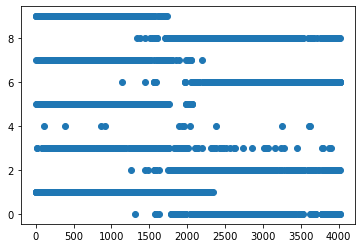

In [52]:
plt.scatter(airlines['ID#'], airlines['clusterid_new'])

# DBSCAN

In [53]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [54]:
array = airlines_norm.values
array

array([[0.01650773, 0.        , 0.        , ..., 0.84374246, 0.        ,
        1.        ],
       [0.01128788, 0.        , 0.        , ..., 0.83988425, 0.        ,
        1.        ],
       [0.02425685, 0.        , 0.        , ..., 0.84784181, 0.        ,
        1.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.16879672, 1.        ,
        0.        ],
       [0.03220189, 0.        , 0.        , ..., 0.16867615, 0.        ,
        1.        ],
       [0.00176908, 0.        , 0.        , ..., 0.16831444, 0.        ,
        1.        ]])

In [55]:
dbscan = DBSCAN(eps = 1, min_samples = 3)
dbscan.fit(array)

DBSCAN(eps=1, min_samples=3)

In [56]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [57]:
cl = pd.DataFrame(dbscan.labels_, columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [58]:
clustered = pd.concat([airlines,cl],axis=1)
clustered

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new,h_clusterid,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,0,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,0,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,8,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,6,1,0


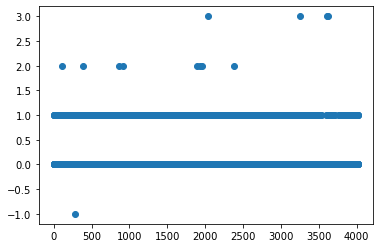

In [59]:
plt.scatter(clustered['ID#'], clustered['cluster'])